# Calculate CAA scavenging rates from observations

Dissolved trace metal data from Manuel Colombo, particulate trace metal data from Jingxuan Li.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
import seaborn as sns; sns.set()
from matplotlib.ticker import FormatStrFormatter

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
Mn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

In [3]:
dMn_BB1 = Mn_data['BB1'].dropna()[1:].astype('float').values
dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float').values
dMn_BB3 = Mn_data['BB3'].dropna()[1:].astype('float').values
dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float').values
dMn_CB2 = Mn_data['CB2'].dropna()[1:].astype('float').values
dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float').values
dMn_CB4 = Mn_data['CB4'].dropna()[1:].astype('float').values
dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float').values
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float').values
dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float').values
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float').values
dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float').values
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float').values
dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float').values
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float').values
dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float').values

In [4]:
depth_BB1 = Mn_data['Depth.2'].dropna().values
depth_BB2 = Mn_data['Depth.3'].dropna().values
depth_BB3 = Mn_data['Depth.4'].dropna().values
depth_CB1 = Mn_data['Depth.14'].dropna().values
depth_CB2 = Mn_data['Depth.15'].dropna().values
depth_CB3 = Mn_data['Depth.16'].dropna().values
depth_CB4 = Mn_data['Depth.17'].dropna().values
depth_CAA1 = Mn_data['Depth.5'].dropna().values
depth_CAA2 = Mn_data['Depth.6'].dropna().values
depth_CAA3 = Mn_data['Depth.7'].dropna().values
depth_CAA4 = Mn_data['Depth.8'].dropna().values
depth_CAA5 = Mn_data['Depth.9'].dropna().values
depth_CAA6 = Mn_data['Depth.10'].dropna().values
depth_CAA7 = Mn_data['Depth.11'].dropna().values
depth_CAA8 = Mn_data['Depth.12'].dropna().values
depth_CAA9 = Mn_data['Depth.13'].dropna().values

In [5]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values

In [6]:
pMn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/pTM_Maldonado_DATA_v2_notes.csv')

In [7]:
stns = pMn_data['GEOTR_STN'].astype('str')
pMn_BB1 = pMn_data['Mn (pmol/L)'].where(stns == 'BB1').dropna().astype('float').values*1e-3 # pM --> nM
pMn_BB2 = pMn_data['Mn (pmol/L)'].where(stns == 'BB2').dropna().astype('float').values*1e-3
pMn_BB3 = pMn_data['Mn (pmol/L)'].where(stns == 'BB3').dropna().astype('float').values*1e-3
pMn_CB1 = pMn_data['Mn (pmol/L)'].where(stns == 'CB1').dropna().astype('float').values*1e-3
pMn_CB2 = pMn_data['Mn (pmol/L)'].where(stns == 'CB2').dropna().astype('float').values*1e-3
pMn_CB3 = pMn_data['Mn (pmol/L)'].where(stns == 'CB3').dropna().astype('float').values*1e-3
pMn_CB4 = pMn_data['Mn (pmol/L)'].where(stns == 'CB4').dropna().astype('float').values*1e-3
pMn_CAA1 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA1').dropna().astype('float').values*1e-3
pMn_CAA2 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA2').dropna().astype('float').values*1e-3
pMn_CAA3 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA3').dropna().astype('float').values*1e-3
pMn_CAA4 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA4').dropna().astype('float').values*1e-3
pMn_CAA5 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA5').dropna().astype('float').values*1e-3
pMn_CAA6 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA6').dropna().astype('float').values*1e-3
pMn_CAA7 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA7').dropna().astype('float').values*1e-3
pMn_CAA8 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA8').dropna().astype('float').values*1e-3
pMn_CAA9 = pMn_data['Mn (pmol/L)'].where(stns == 'CAA9').dropna().astype('float').values*1e-3

In [8]:
pdepth_BB1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB1').dropna().astype('float').values
pdepth_BB2 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB2').dropna().astype('float').values
pdepth_BB3 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB3').dropna().astype('float').values
pdepth_CB1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB1').dropna().astype('float').values
pdepth_CB2 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB2').dropna().astype('float').values
pdepth_CB3 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB3').dropna().astype('float').values
pdepth_CB4 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CB4').dropna().astype('float').values
pdepth_CAA1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA1').dropna().astype('float').values
pdepth_CAA2 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA2').dropna().astype('float').values
pdepth_CAA3 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA3').dropna().astype('float').values
pdepth_CAA4 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA4').dropna().astype('float').values
pdepth_CAA5 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA5').dropna().astype('float').values
pdepth_CAA6 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA6').dropna().astype('float').values
pdepth_CAA7 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA7').dropna().astype('float').values
pdepth_CAA8 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA8').dropna().astype('float').values
pdepth_CAA9 = pMn_data['CTDPRS (DBAR)'].where(stns == 'CAA9').dropna().astype('float').values

For each station, find a similar depth:

In [9]:
def assoc_depth(depth_pMn, depth_dMn, pMn_stn, dMn_stn):
    if len(depth_pMn) > len(depth_dMn):
        depth_list    = np.array(depth_pMn)
        depth_shorter = np.array(depth_dMn)
    else:
        depth_list    = np.array(depth_dMn)
        depth_shorter = np.array(depth_pMn)

    depths= np.empty_like(depth_list)
    pMn   = np.empty_like(depth_list)
    dMn   = np.empty_like(depth_list)
    i=0

    for depth in depth_list:
        min_val  = np.argmin(np.abs(depth_shorter - depth))
        
        if np.abs(depth_shorter[min_val] - depth) > 10:
            depths[i] = np.nan
            pMn[i]    = np.nan
            dMn[i]    = np.nan
        else:
            depths[i] = depth_shorter[min_val]
            if len(depth_pMn) > len(depth_dMn):
                pMn[i]    = pMn_stn[i]
                dMn[i]    = dMn_stn[min_val]                
            else:
                pMn[i]    = pMn_stn[min_val]
                dMn[i]    = dMn_stn[i] #indexed starting with 1 instead of 0 (removed + 1)
        i+=1
        
    return depths, pMn, dMn

In [10]:
depths_CAA1, pmn_CAA1, dmn_CAA1 = assoc_depth(pdepth_CAA1, depth_CAA1, pMn_CAA1, dMn_CAA1)
# depths_CAA2, pmn_CAA2, dmn_CAA2 = assoc_depth(pdepth_CAA2, depth_CAA2, pMn_CAA2, dMn_CAA2)
depths_CAA3, pmn_CAA3, dmn_CAA3 = assoc_depth(pdepth_CAA3, depth_CAA3, pMn_CAA3, dMn_CAA3)
depths_CAA4, pmn_CAA4, dmn_CAA4 = assoc_depth(pdepth_CAA4, depth_CAA4, pMn_CAA4, dMn_CAA4)
depths_CAA5, pmn_CAA5, dmn_CAA5 = assoc_depth(pdepth_CAA5, depth_CAA5, pMn_CAA5, dMn_CAA5)
depths_CAA6, pmn_CAA6, dmn_CAA6 = assoc_depth(pdepth_CAA6, depth_CAA6, pMn_CAA6, dMn_CAA6)
depths_CAA7, pmn_CAA7, dmn_CAA7 = assoc_depth(pdepth_CAA7, depth_CAA7, pMn_CAA7, dMn_CAA7)
depths_CAA8, pmn_CAA8, dmn_CAA8 = assoc_depth(pdepth_CAA8, depth_CAA8, pMn_CAA8, dMn_CAA8)
depths_CAA9, pmn_CAA9, dmn_CAA9 = assoc_depth(pdepth_CAA9, depth_CAA9, pMn_CAA9, dMn_CAA9)

In [11]:
depths_CB1, pmn_CB1, dmn_CB1 = assoc_depth(pdepth_CB1, depth_CB1, pMn_CB1, dMn_CB1)
depths_CB2, pmn_CB2, dmn_CB2 = assoc_depth(pdepth_CB2, depth_CB2, pMn_CB2, dMn_CB2)
depths_CB3, pmn_CB3, dmn_CB3 = assoc_depth(pdepth_CB3, depth_CB3, pMn_CB3, dMn_CB3)
depths_CB4, pmn_CB4, dmn_CB4 = assoc_depth(pdepth_CB4, depth_CB4, pMn_CB4, dMn_CB4)

In [12]:
depths_BB1, pmn_BB1, dmn_BB1 = assoc_depth(pdepth_BB1, depth_BB1, pMn_BB1, dMn_BB1)
depths_BB2, pmn_BB2, dmn_BB2 = assoc_depth(pdepth_BB2, depth_BB2, pMn_BB2, dMn_BB2)
depths_BB3, pmn_BB3, dmn_BB3 = assoc_depth(pdepth_BB3, depth_BB3, pMn_BB3, dMn_BB3)

## Calculating scavenging rates:

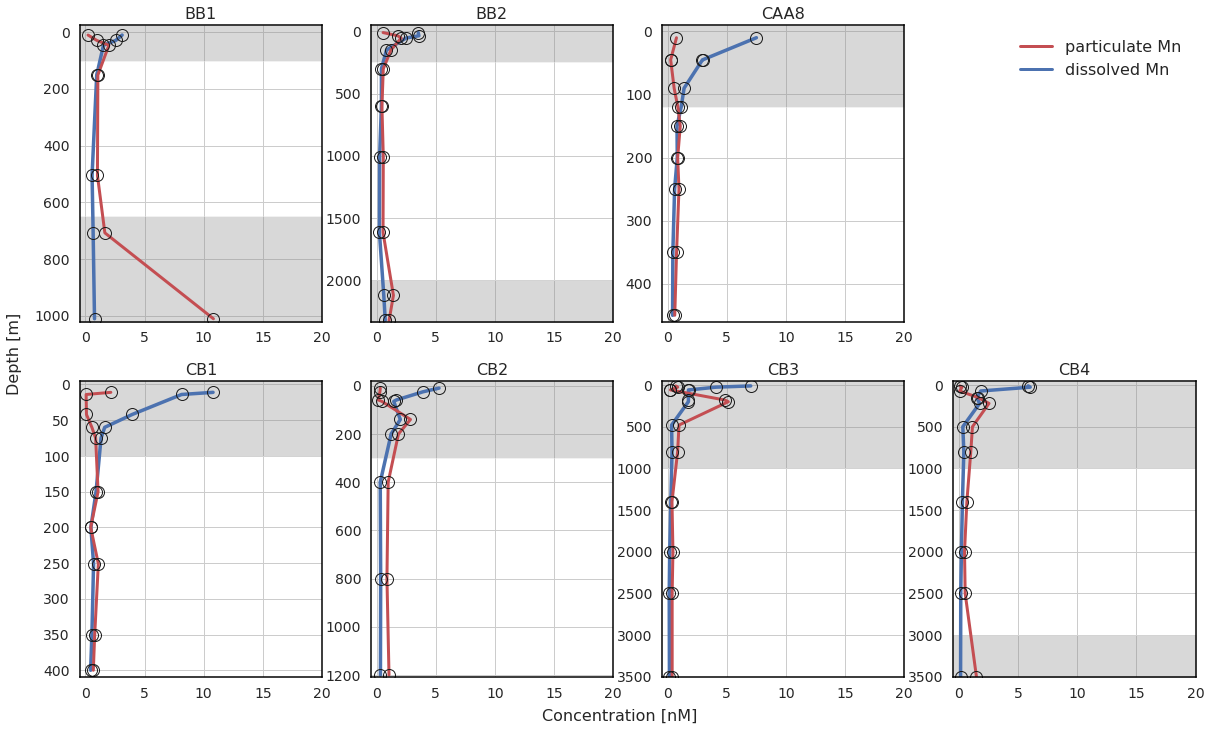

In [13]:
st = sns.axes_style("whitegrid")

with st:
    fig, ax = plt.subplots(2,4, figsize=(20,12))
    for axs in ax[0,:]:
        axs.invert_yaxis()
        axs.set_xlim([-0.5, 20])
        axs.tick_params(axis='both', which='major', labelsize=14)
        axs.set_xticks([0,5,10,15,20])
        axs.spines['left'].set_linewidth(1.5);   axs.spines['left'].set_color('black');
        axs.spines['bottom'].set_linewidth(1.5); axs.spines['bottom'].set_color('black');
        axs.spines['right'].set_linewidth(1.5);  axs.spines['right'].set_color('black');
        axs.spines['top'].set_linewidth(1.5);    axs.spines['top'].set_color('black');

    for axs in ax[1,:]:
        axs.invert_yaxis()
        axs.set_xlim([-0.5, 20])
        axs.tick_params(axis='both', which='major', labelsize=14)
        axs.set_xticks([0,5,10,15,20])
        axs.spines['left'].set_linewidth(1.5);   axs.spines['left'].set_color('black');
        axs.spines['bottom'].set_linewidth(1.5); axs.spines['bottom'].set_color('black');
        axs.spines['right'].set_linewidth(1.5);  axs.spines['right'].set_color('black');
        axs.spines['top'].set_linewidth(1.5);    axs.spines['top'].set_color('black');

    ax[0,3].axis('off')
    
    ax[0,0].plot(dmn_BB1[~np.isnan(dmn_BB1)], depths_BB1[~np.isnan(dmn_BB1)], '-', linewidth=3.5)
    ax[0,1].plot(dmn_BB2[~np.isnan(dmn_BB2)], depths_BB2[~np.isnan(dmn_BB2)], '-', linewidth=3.5)
    ax[0,2].plot(dmn_CAA8[~np.isnan(dmn_CAA8)], depths_CAA8[~np.isnan(dmn_CAA8)], '-', linewidth=3.5)
    ax[0,0].plot(pmn_BB1[~np.isnan(pmn_BB1)], depths_BB1[~np.isnan(pmn_BB1)], '-r', linewidth=3.0)
    ax[0,1].plot(pmn_BB2[~np.isnan(pmn_BB2)], depths_BB2[~np.isnan(pmn_BB2)], '-r', linewidth=3.0)
    ax[0,2].plot(pmn_CAA8[~np.isnan(pmn_CAA8)], depths_CAA8[~np.isnan(pmn_CAA8)], '-r', linewidth=3.0)
    ax[0,0].plot(dmn_BB1[~np.isnan(dmn_BB1)], depths_BB1[~np.isnan(dmn_BB1)], 'ok', fillstyle='none', markersize=12)
    ax[0,1].plot(dmn_BB2[~np.isnan(dmn_BB2)], depths_BB2[~np.isnan(dmn_BB2)], 'ok', fillstyle='none', markersize=12)
    ax[0,2].plot(dmn_CAA8[~np.isnan(dmn_CAA8)], depths_CAA8[~np.isnan(dmn_CAA8)], 'ok', fillstyle='none', markersize=12)
    ax[0,0].plot(pmn_BB1[~np.isnan(pmn_BB1)], depths_BB1[~np.isnan(pmn_BB1)], 'ok', fillstyle='none', markersize=12)
    ax[0,1].plot(pmn_BB2[~np.isnan(pmn_BB2)], depths_BB2[~np.isnan(pmn_BB2)], 'ok', fillstyle='none', markersize=12)
    ax[0,2].plot(pmn_CAA8[~np.isnan(pmn_CAA8)], depths_CAA8[~np.isnan(pmn_CAA8)], 'ok', fillstyle='none', markersize=12)

    ax[1,0].plot(dmn_CB1[~np.isnan(dmn_CB1)], depths_CB1[~np.isnan(dmn_CB1)], '-', linewidth=3.5)
    ax[1,1].plot(dmn_CB2[~np.isnan(dmn_CB2)], depths_CB2[~np.isnan(dmn_CB2)], '-', linewidth=3.5)
    ax[1,2].plot(dmn_CB3[~np.isnan(dmn_CB3)], depths_CB3[~np.isnan(dmn_CB3)], '-', linewidth=3.5)
    ax[1,3].plot(dmn_CB4[~np.isnan(dmn_CB4)], depths_CB4[~np.isnan(dmn_CB4)], '-', linewidth=3.5)
    ax[1,0].plot(pmn_CB1[~np.isnan(pmn_CB1)], depths_CB1[~np.isnan(pmn_CB1)], '-r', linewidth=3.0)
    ax[1,1].plot(pmn_CB2[~np.isnan(pmn_CB2)], depths_CB2[~np.isnan(pmn_CB2)], '-r', linewidth=3.0)
    ax[1,2].plot(pmn_CB3[~np.isnan(pmn_CB3)], depths_CB3[~np.isnan(pmn_CB3)], '-r', linewidth=3.0)
    ax[1,3].plot(pmn_CB4[~np.isnan(pmn_CB4)], depths_CB4[~np.isnan(pmn_CB4)], '-r', linewidth=3.0)
    ax[1,0].plot(dmn_CB1[~np.isnan(dmn_CB1)], depths_CB1[~np.isnan(dmn_CB1)], 'ok', fillstyle='none', markersize=12)
    ax[1,1].plot(dmn_CB2[~np.isnan(dmn_CB2)], depths_CB2[~np.isnan(dmn_CB2)], 'ok', fillstyle='none', markersize=12)
    ax[1,2].plot(dmn_CB3[~np.isnan(dmn_CB3)], depths_CB3[~np.isnan(dmn_CB3)], 'ok', fillstyle='none', markersize=12)
    ax[1,3].plot(dmn_CB4[~np.isnan(dmn_CB4)], depths_CB4[~np.isnan(dmn_CB4)], 'ok', fillstyle='none', markersize=12)
    ax[1,0].plot(pmn_CB1[~np.isnan(pmn_CB1)], depths_CB1[~np.isnan(pmn_CB1)], 'ok', fillstyle='none', markersize=12)
    ax[1,1].plot(pmn_CB2[~np.isnan(pmn_CB2)], depths_CB2[~np.isnan(pmn_CB2)], 'ok', fillstyle='none', markersize=12)
    ax[1,2].plot(pmn_CB3[~np.isnan(pmn_CB3)], depths_CB3[~np.isnan(pmn_CB3)], 'ok', fillstyle='none', markersize=12)
    ax[1,3].plot(pmn_CB4[~np.isnan(pmn_CB4)], depths_CB4[~np.isnan(pmn_CB4)], 'ok', fillstyle='none', markersize=12)
    
    #grey boxes:
    ax[0,0].fill_between([-2,20], [-25,-25], [100,100], facecolor='grey', alpha=0.3)
    ax[0,0].fill_between([-2,20], [650,650], [depths_BB1[-1]+80, depths_BB1[-1]+80], facecolor='grey', alpha=0.3)
    ax[0,0].set_ylim([depths_BB1[-1]+10, -25])
    ax[0,1].fill_between([-2,20], [-50,-50] , [250, 250], facecolor='grey', alpha=0.3)
    ax[0,1].fill_between([-2,20], [2000,2000], [depths_BB2[-1]+80, depths_BB2[-1]+80], facecolor='grey', alpha=0.3)
    ax[0,1].set_ylim([depths_BB2[-1]+10, -50])
    ax[0,2].fill_between([-2,20], [-10,-10]    , [120, 120], facecolor='grey', alpha=0.3)
    ax[0,2].set_ylim([depths_CAA8[-1]+10, -10])

    ax[1,0].fill_between([-2,20], [-10,-10]  ,[100,100], facecolor='grey', alpha=0.3)
    ax[1,0].set_ylim([depths_CB1[-1]+10, -5])
    ax[1,1].fill_between([-2,20], [-20,-20]  ,[300,300], facecolor='grey', alpha=0.3)
    ax[1,1].set_ylim([depths_CB2[-1]+10, -20])
    ax[1,2].fill_between([-2,20], [-50,-50]  ,[1000,1000], facecolor='grey', alpha=0.3)
    ax[1,2].set_ylim([depths_CB3[-1]+10, -50])
    ax[1,3].fill_between([-2,20], [-50,-50]  ,[1000,1000], facecolor='grey', alpha=0.3)
    ax[1,3].fill_between([-2,20], [3000,3000], [depths_CB4[-1]+80, depths_CB4[-1]+80], facecolor='grey', alpha=0.3)
    ax[1,3].set_ylim([depths_CB4[-1]+10, -50])
    
    ax[0,3].plot(-1,2, '-r', linewidth=3, label='particulate Mn')
    ax[0,3].plot(-1,2, '-', linewidth=3, label='dissolved Mn')

    ax[0,0].set_title('BB1', fontsize=16)
    ax[0,1].set_title('BB2', fontsize=16)
    ax[0,2].set_title('CAA8', fontsize=16)
    ax[1,0].set_title('CB1', fontsize=16)
    ax[1,1].set_title('CB2', fontsize=16)
    ax[1,2].set_title('CB3', fontsize=16)
    ax[1,3].set_title('CB4', fontsize=16)

    ax[0,3].legend(frameon=False, fontsize=16)
    
    fig.text(0.5, 0.08, 'Concentration [nM]', ha='center', va='center', fontsize=16)
    fig.text(0.08, 0.5, 'Depth [m]', ha='center', va='center', rotation='vertical', fontsize=16)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A1-scavenging-stns.png', bbox_inches='tight', dpi=300)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A1-scavenging-stns.svg', bbox_inches='tight', dpi=300, format='svg')

In [14]:
dmn = np.concatenate((dmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)], \
                      dmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                      dmn_CAA8[(depths_CAA8 > 120) & (depths_CAA8 < 500)], \
                      dmn_CB1[(depths_CB1 > 100) & (depths_CB1 < 400)], \
                      dmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                      dmn_CB3[depths_CB3 > 500], \
                      dmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)]))
pmn = np.concatenate((pmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)], \
                      pmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                      pmn_CAA8[(depths_CAA8 > 120) & (depths_CAA8 < 500)], \
                      pmn_CB1[(depths_CB1 > 100) & (depths_CB1 < 400)], \
                      pmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                      pmn_CB3[depths_CB3 > 500], \
                      pmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)]))

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dmn, pmn)

print(slope, intercept, r_value**2)

0.7879000238183478 0.38385305893574634 0.5267471763620353


In [22]:
import statsmodels.api as sm


xp      = np.linspace(0,1.0,20)
xp_fit  = xp.reshape((-1, 1)) 
dmn_fit = dmn.reshape((-1, 1))
pmn_fit = pmn

ols = sm.OLS(pmn_fit, dmn_fit)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              210.4
Date:                Tue, 10 Aug 2021   Prob (F-statistic):                    1.12e-13
Time:                        15:37:16   Log-Likelihood:                        -0.82691
No. Observations:                  26   AIC:                                      3.654
Df Residuals:                      25   BIC:                                      4.912
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4790      0.102     14.506      0.000       1.269       1.689
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.170
Skew:                          -0.088   Prob(JB):                        0.919
Kurtosis:                       2.645   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope:  [1.47895544]
score:  <bound method RegressorMixin.score of LinearRegression(fit_intercept=False)>


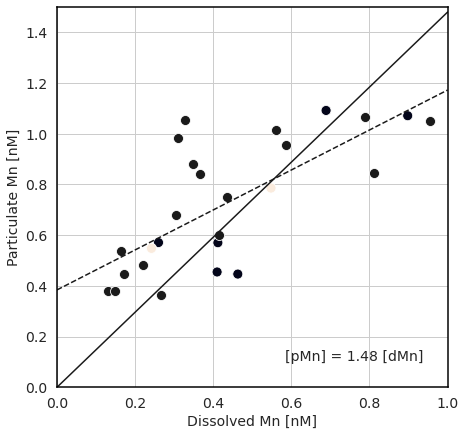

In [88]:
fig = plt.figure(figsize=(7,7))

xp      = np.linspace(0,1.0,20)
xp_fit  = xp.reshape((-1, 1)) 
dmn_fit = dmn.reshape((-1, 1))
pmn_fit = pmn
model   = LinearRegression(fit_intercept=False).fit(dmn_fit, pmn_fit)
r_sq    = model.score(dmn_fit, pmn_fit)
yp_pred = model.predict(xp_fit)
print('slope: ', model.coef_)
print('score: ', model.score)


st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(xp, yp_pred, c='k')

    sns.scatterplot(dmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)],  \
                    pmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)],  s=100, color='k')
    sns.scatterplot(dmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                    pmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], s=100, color='k')
    sns.scatterplot(dmn_CAA8[(depths_CAA8 > 120) & (depths_CAA8 < 500)], \
                    pmn_CAA8[(depths_CAA8 > 120) & (depths_CAA8 < 500)], s=100, color='k')
    sns.scatterplot(dmn_CB1[(depths_CB1 > 100) & (depths_CB1 < 400)], \
                    pmn_CB1[(depths_CB1 > 100) & (depths_CB1 < 400)], s=100, color='k')
    sns.scatterplot(dmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                    pmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], s=100, color='k')
    sns.scatterplot(dmn_CB3[depths_CB3 > 500], \
                    pmn_CB3[depths_CB3 > 500], s=100, color='k')
    sns.scatterplot(dmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)], \
                    pmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)], s=100, color='k')
    
    sns.lineplot(xp, xp*slope + intercept, c='k', linestyle='--')

    ax.set_ylabel('Particulate Mn [nM]', fontsize=14)
    ax.set_xlabel('Dissolved Mn [nM]', fontsize=14)
    ax.set(ylim=(0,1.5), xlim=(0,1.0))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');    
    
    ax.text(0.76, 0.08,'[pMn] = 1.48 [dMn]', fontsize=14, horizontalalignment='center', \
            verticalalignment='center', transform=ax.transAxes);

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A2-scavenging-rate.png', bbox_inches='tight', dpi=300)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A2-scavenging-rate.svg', bbox_inches='tight', dpi=300, format='svg')

In [23]:
print(np.mean(pmn)/np.mean(dmn))

1.675974372664175


slope:  [1.47895544]
score:  <bound method RegressorMixin.score of LinearRegression(fit_intercept=False)>


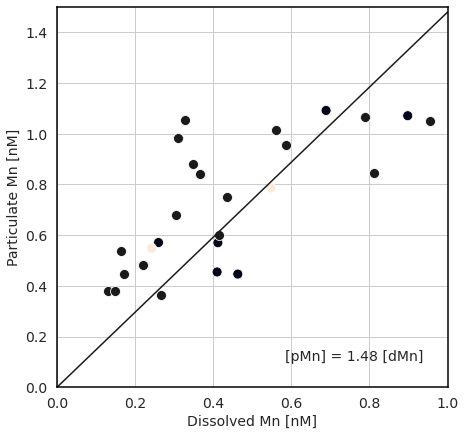

In [76]:
fig = plt.figure(figsize=(7,7))

xp      = np.linspace(0,1.0,20)
xp_fit  = xp.reshape((-1, 1)) 
dmn_fit = dmn.reshape((-1, 1))
pmn_fit = pmn
model   = LinearRegression(fit_intercept=False).fit(dmn_fit, pmn_fit)
r_sq    = model.score(dmn_fit, pmn_fit)
yp_pred = model.predict(xp_fit)
print('slope: ', model.coef_)
print('score: ', model.score)


st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(xp, yp_pred, c='k')

    sns.scatterplot(dmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)],  \
                    pmn_BB1[(depths_BB1 > 100) & (depths_BB1 < 650)],  s=100, color='k')
    sns.scatterplot(dmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], \
                    pmn_BB2[(depths_BB2 > 250) & (depths_BB2 < 2000)], s=100, color='k')
    sns.scatterplot(dmn_CAA8[(depths_CAA8 > 120) & (depths_CAA8 < 500)], \
                    pmn_CAA8[(depths_CAA8 > 120) & (depths_CAA8 < 500)], s=100, color='k')
    sns.scatterplot(dmn_CB1[(depths_CB1 > 100) & (depths_CB1 < 400)], \
                    pmn_CB1[(depths_CB1 > 100) & (depths_CB1 < 400)], s=100, color='k')
    sns.scatterplot(dmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], \
                    pmn_CB2[(depths_CB2 > 300) & (depths_CB2 < 1250)], s=100, color='k')
    sns.scatterplot(dmn_CB3[depths_CB3 > 500], \
                    pmn_CB3[depths_CB3 > 500], s=100, color='k')
    sns.scatterplot(dmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)], \
                    pmn_CB4[(depths_CB4 > 1000) & (depths_CB4 < 3000)], s=100, color='k')

    ax.set_ylabel('Particulate Mn [nM]', fontsize=14)
    ax.set_xlabel('Dissolved Mn [nM]', fontsize=14)
    ax.set(ylim=(0,1.5), xlim=(0,1.0))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');    
    
    ax.text(0.76, 0.08,'[pMn] = 1.48 [dMn]', fontsize=14, horizontalalignment='center', \
            verticalalignment='center', transform=ax.transAxes);

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A2-scavenging-rate.png', bbox_inches='tight', dpi=300)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A2-scavenging-rate.svg', bbox_inches='tight', dpi=300, format='svg')